
# Random Forest

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importar datos de cuenca

In [ ]:
df = pd.read_csv('./drive/MyDrive/DatosInvestigacion/2015_2016_dataset.csv', index_col=0, parse_dates=True)

<ipython-input-13-4b0d35808564>:1: DtypeWarning: Columns (20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./drive/MyDrive/DatosInvestigacion/2015_2016_dataset.csv', index_col=0, parse_dates=True)


In [ ]:
df = df.asfreq('h')

In [ ]:
df_rs = pd.DataFrame()
df_rs['RSG'] = df['SRGLOAVG1H'].between_time('08:00:00','17:00:00')

In [ ]:
df_rs.head()

,RSG
Local_Time,
2015-01-01 08:00:00,107.0
2015-01-01 09:00:00,394.0
2015-01-01 10:00:00,728.0
2015-01-01 11:00:00,428.0
2015-01-01 12:00:00,403.0


## Crear lags

In [ ]:
# data until 1 day before
for i in range(1, 11):
  df_rs[f't-{i}'] = df_rs['RSG'].shift(i)
df_rs.dropna(inplace=True)

In [ ]:
df_rs.shape

(7300, 11)

In [ ]:
df_rs.head(10)

,RSG,t-1,t-2,t-3,t-4,t-5,t-6,t-7,t-8,t-9,t-10
Local_Time,,,,,,,,,,,
2015-01-02 08:00:00,97.0,136.0,308.0,594.0,397.0,709.0,403.0,428.0,728.0,394.0,107.0
2015-01-02 09:00:00,118.0,97.0,136.0,308.0,594.0,397.0,709.0,403.0,428.0,728.0,394.0
2015-01-02 10:00:00,227.0,118.0,97.0,136.0,308.0,594.0,397.0,709.0,403.0,428.0,728.0
2015-01-02 11:00:00,408.0,227.0,118.0,97.0,136.0,308.0,594.0,397.0,709.0,403.0,428.0
2015-01-02 12:00:00,674.0,408.0,227.0,118.0,97.0,136.0,308.0,594.0,397.0,709.0,403.0
2015-01-02 13:00:00,459.0,674.0,408.0,227.0,118.0,97.0,136.0,308.0,594.0,397.0,709.0
2015-01-02 14:00:00,377.0,459.0,674.0,408.0,227.0,118.0,97.0,136.0,308.0,594.0,397.0
2015-01-02 15:00:00,302.0,377.0,459.0,674.0,408.0,227.0,118.0,97.0,136.0,308.0,594.0
2015-01-02 16:00:00,310.0,302.0,377.0,459.0,674.0,408.0,227.0,118.0,97.0,136.0,308.0


In [ ]:
# Split the Data
train_size = int(len(df_rs) * 0.8)  # Splitting 80% for training
train, test = df_rs[:train_size], df_rs[train_size:]

In [ ]:
train.shape

(5840, 11)

### Crear modelo

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Train the Random Forest Model
X_train, y_train = train.iloc[:, 1:], train.iloc[:, 0]
X_test, y_test = test.iloc[:, 1:], test.iloc[:, 0]

In [ ]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
# Step 5: Make Predictions
predictions = model.predict(X_test)

In [ ]:
len(predictions)

1460

In [ ]:
len(test)

1460

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
errorRF_MSE = mean_squared_error(y_test,predictions)
errorRF_MSE

27298.255049619343

In [ ]:
np.sqrt(errorRF_MSE)

165.2218358741342

In [ ]:
errorRF_MAE = mean_absolute_error(y_test,predictions)
errorRF_MAE

127.39442208447487

In [ ]:
plot_df = pd.DataFrame()
plot_df['real_value'] = y_test
plot_df['prediction'] = predictions

<Axes: xlabel='Local_Time'>

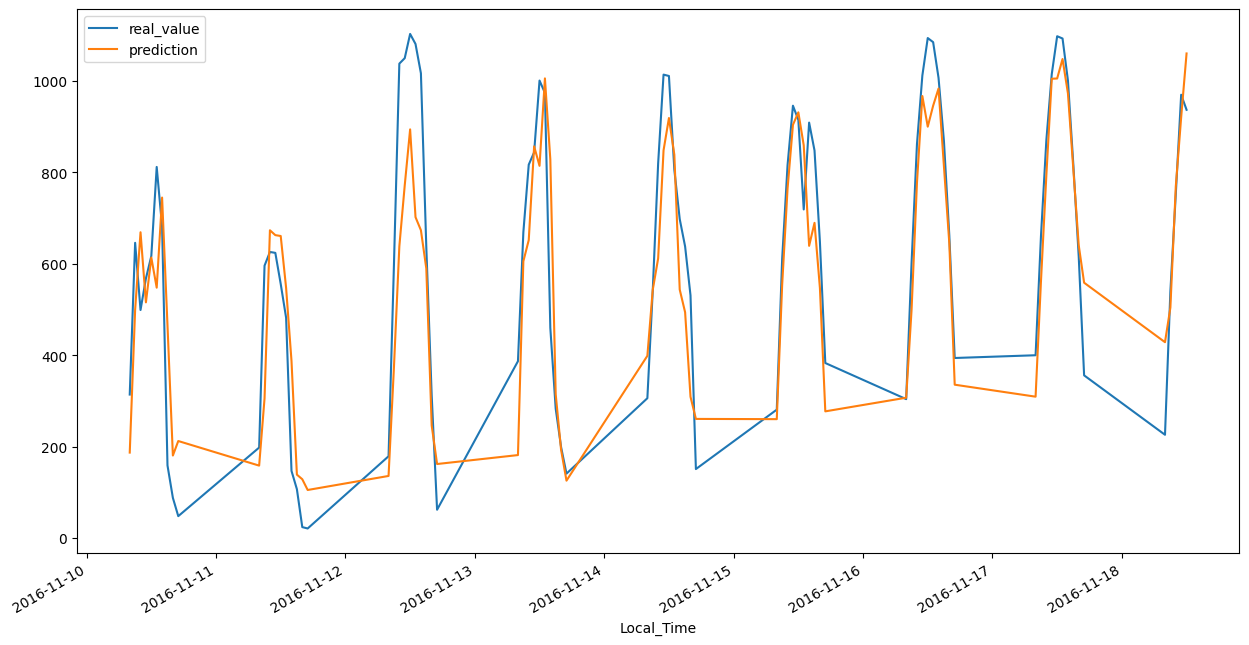

In [ ]:
plot_df[:]['2016-11-10 7:00:00':'2016-11-18 12:00:00'].plot(figsize=(15,8))

## Encontrar mejor modelo RF

In [ ]:

# Number of trees in random forest
n_estimators = [100,200,300]
# Maximum number of levels in tree
max_depth = [20,50,70,100]
# back hours
b_h = [5,10,15,20,25,30]

In [ ]:
results = []
min_RMSE = 100000
best_model = None

In [ ]:
for bh_i in b_h:
  # create temporal dataset
  df_t = pd.DataFrame()
  df_t['RSG'] = df['SRGLOAVG1H'].between_time('08:00:00','17:00:00')
  for i in range(1, bh_i+1):
    df_t[f't-{i}'] = df_t['RSG'].shift(i)
  df_t.dropna(inplace=True)
  train_size = int(len(df_t) * 0.8)  # Splitting 80% for training
  train, test = df_t[:train_size], df_t[train_size:]
  X_train, y_train = train.iloc[:, 1:], train.iloc[:, 0]
  X_test, y_test = test.iloc[:, 1:], test.iloc[:, 0]
  # grid search
  for n_i in n_estimators:
    for d_i in max_depth:
      model = RandomForestRegressor(n_estimators=n_i,max_depth=d_i,random_state=1)
      model.fit(X_train, y_train)
      # test
      predictions = model.predict(X_test)
      errorRF_MSE = mean_squared_error(y_test,predictions)
      RMSE = np.sqrt(errorRF_MSE)
      errorRF_MAE = mean_absolute_error(y_test,predictions)

      if(RMSE < min_RMSE):
        print('best')
        best_model = model
        min_RMSE = RMSE
      results.append({
          'back_hours':bh_i,
          'n_estimators':n_i,
          'max_depth':d_i,
          'RMSE': RMSE,
          'MSE': errorRF_MSE,
          'MAE': errorRF_MAE
      })
      print(results[-1])

best
{'back_hours': 5, 'n_estimators': 100, 'max_depth': 20, 'RMSE': 184.1636195988769, 'MSE': 33916.238783759836, 'MAE': 144.701551684693}
best
{'back_hours': 5, 'n_estimators': 100, 'max_depth': 50, 'RMSE': 184.00277486308505, 'MSE': 33857.02115731517, 'MAE': 144.61896501711158}
{'back_hours': 5, 'n_estimators': 100, 'max_depth': 70, 'RMSE': 184.00277486308505, 'MSE': 33857.02115731517, 'MAE': 144.61896501711158}
{'back_hours': 5, 'n_estimators': 100, 'max_depth': 100, 'RMSE': 184.00277486308505, 'MSE': 33857.02115731517, 'MAE': 144.61896501711158}
best
{'back_hours': 5, 'n_estimators': 200, 'max_depth': 20, 'RMSE': 183.68257525438418, 'MSE': 33739.2884520825, 'MAE': 144.32082872875802}
best
{'back_hours': 5, 'n_estimators': 200, 'max_depth': 50, 'RMSE': 183.55522034598968, 'MSE': 33692.518916264824, 'MAE': 144.29013343600275}
{'back_hours': 5, 'n_estimators': 200, 'max_depth': 70, 'RMSE': 183.55522034598968, 'MSE': 33692.518916264824, 'MAE': 144.29013343600275}
{'back_hours': 5, 'n_

In [ ]:
bh_i = 25
# create temporal dataset
df_t = pd.DataFrame()
df_t['RSG'] = df['SRGLOAVG1H'].between_time('08:00:00','17:00:00')
for i in range(1, bh_i+1):
  df_t[f't-{i}'] = df_t['RSG'].shift(i)
df_t.dropna(inplace=True)
train_size = int(len(df_t) * 0.8)  # Splitting 80% for training
train, test = df_t[:train_size], df_t[train_size:]
X_train, y_train = train.iloc[:, 1:], train.iloc[:, 0]
X_test, y_test = test.iloc[:, 1:], test.iloc[:, 0]
# grid search
for n_i in n_estimators:
  for d_i in max_depth:
    model = RandomForestRegressor(n_estimators=n_i,max_depth=d_i,random_state=1)
    model.fit(X_train, y_train)
    # test
    predictions = model.predict(X_test)
    errorRF_MSE = mean_squared_error(y_test,predictions)
    RMSE = np.sqrt(errorRF_MSE)
    errorRF_MAE = mean_absolute_error(y_test,predictions)

    if(RMSE < min_RMSE):
      print('best')
      best_model = model
      min_RMSE = RMSE
    results.append({
        'back_hours':bh_i,
        'n_estimators':n_i,
        'max_depth':d_i,
        'RMSE': RMSE,
        'MSE': errorRF_MSE,
        'MAE': errorRF_MAE
    })
    print(results[-1])

{'back_hours': 25, 'n_estimators': 100, 'max_depth': 20, 'RMSE': 162.95194166666522, 'MSE': 26553.335292936263, 'MAE': 126.43953633792181}
{'back_hours': 25, 'n_estimators': 100, 'max_depth': 50, 'RMSE': 162.54896026129384, 'MSE': 26422.164482027685, 'MAE': 126.18314494166093}
{'back_hours': 25, 'n_estimators': 100, 'max_depth': 70, 'RMSE': 162.54896026129384, 'MSE': 26422.164482027685, 'MAE': 126.18314494166093}
{'back_hours': 25, 'n_estimators': 100, 'max_depth': 100, 'RMSE': 162.54896026129384, 'MSE': 26422.164482027685, 'MAE': 126.18314494166093}
{'back_hours': 25, 'n_estimators': 200, 'max_depth': 20, 'RMSE': 162.993989727984, 'MSE': 26567.04068744615, 'MAE': 126.34553746241022}
{'back_hours': 25, 'n_estimators': 200, 'max_depth': 50, 'RMSE': 162.46267282838295, 'MSE': 26394.120062542203, 'MAE': 125.90328578929305}
{'back_hours': 25, 'n_estimators': 200, 'max_depth': 70, 'RMSE': 162.46267282838295, 'MSE': 26394.120062542203, 'MAE': 125.90328578929305}
{'back_hours': 25, 'n_estimat

### Gráfico de error

In [ ]:
df_results = pd.DataFrame(results)

In [ ]:
df_results.to_csv('rf_uRSG_cuenca.csv')

In [ ]:
df_results.to_csv('/content/drive/MyDrive/DatosInvestigacion/results_rf_uRSG_cuenca.csv')

In [ ]:
import seaborn as sns

<Axes: xlabel='back_hours', ylabel='RMSE'>

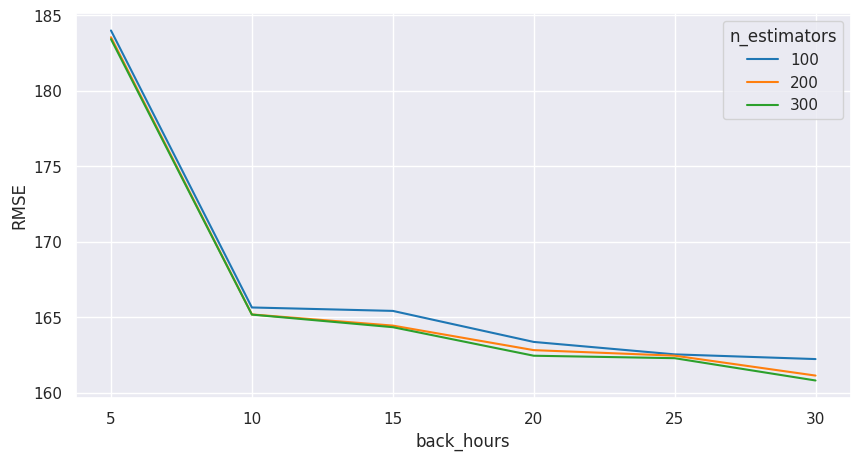

In [ ]:
sns.set(rc={"figure.figsize":(10, 5)})
sns.lineplot(data=df_results, x='back_hours', y='RMSE',hue='n_estimators',palette='tab10',err_style="bars", errorbar=('ci', 0), estimator=np.min)

<Axes: xlabel='max_depth', ylabel='RMSE'>

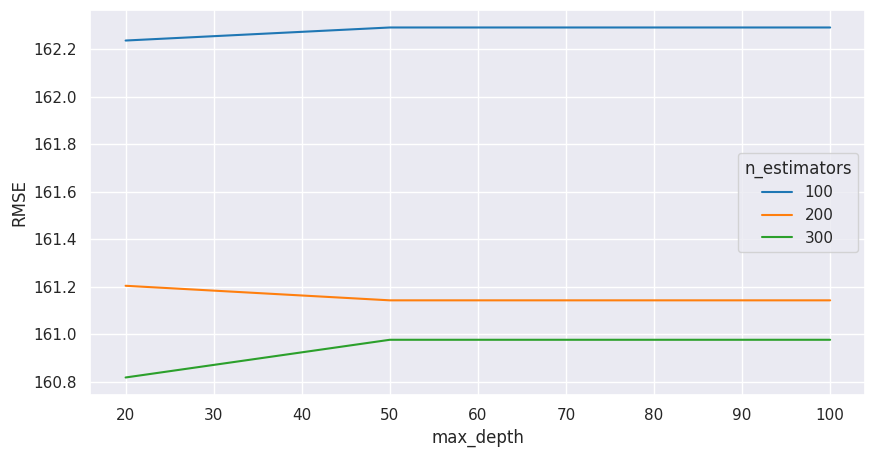

In [ ]:
sns.set(rc={"figure.figsize":(10, 5)})
sns.lineplot(data=df_results, x='max_depth', y='RMSE',hue='n_estimators',palette='tab10',err_style="bars", errorbar=('ci', 0), estimator=np.min)

In [ ]:
df_results[df_results['RMSE'] == df_results['RMSE'].min()]

,back_hours,n_estimators,max_depth,RMSE,MSE,MAE
62,30,300,20,160.818639,25862.634614,125.061917
